In [8]:
%load_ext autoreload
%autoreload 1

import src_loader

import image_processing as ip
import os
import cv2
import pandas as pd
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


TypeError: Image data of dtype object cannot be converted to float

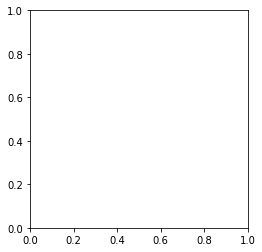

In [22]:
train_dir = '../Data/CheXpert-v1.0'
patient = 'valid/patient16816/study1/view1_frontal.jpg'
patient = os.path.join(train_dir, patient)
ip.load_show_img(patient)
ip.load_img_rgb(patient).shape

In [ ]:
ip.show_img_gray(ip.load_img_gray(patient))

In [ ]:
#for img in ip.dir_get_all_img(train_dir):
#    print(img)

In [ ]:
#for img in ip.dir_get_all_frontal(train_dir):
#    print(ip.load_img_gray(patient).shape)

In [ ]:
ip.show_img_gray(ip.shrink_by_factor(ip.load_img_rgb(patient), 0.5))

In [ ]:
ip.show_img_gray(ip.shrink_width_keep_aspect(ip.load_img_rgb(patient), 500))

In [ ]:
ip.shrink_width_keep_aspect(ip.load_img_rgb(patient), 333).shape

In [ ]:
import pandas as pd
labels = pd.read_csv('Data/CheXpert-v1.0/train.csv')
#paths = list(labels.Path)
#x = labels.loc[labels['Path'].isin((paths[0], paths[2]))].iloc[0]
#for d in labels.iloc[0][5:]:
#    print(d)
    
#labels.iloc[[1,2,3]].iloc[[0]]
labels

In [ ]:
%aimport image_processing
#ip.subsample_dataset('Data/CheXpert-v1.0/train.csv', amount = 20000)
#ip.copy_files('Data/CheXpert-v1.0/train-subsampled-frontal-20000.csv')
ip.rename_paths('Data/CheXpert-v1.0/train-subsampled-frontal-20000.csv', 'CheXpert-v1.0-subsampled/train')

In [ ]:
#ip.del_subsample_dir('Data/CheXpert-v1.0/train-subsampled-frontal-8000')

In [ ]:
import datasets as ds
import image_processing as ip
from collections import Counter
from PIL import Image
import pandas as pd
#data = ds.NaiveResizeGray('Data/CheXpert-v1.0', 'Data/CheXpert-v1.0/train-subsampled-frontal-100.csv')
#concat = ds.concat_imgs_1channel(data.paths)
#determine_nomalization(concat)
#print(data.labels)
min_y, max_y, min_x, max_x, sizes = ds.determine_sizes('Data/CheXpert-v1.0', ['Data/CheXpert-v1.0/train.csv', 'Data/CheXpert-v1.0/valid.csv'])

In [ ]:
import numpy as np
labels = pd.read_csv('Data/CheXpert-v1.0/train.csv')

labels['width'] = sizes[:labels.shape[0],0].astype(int)
labels['height'] = sizes[:labels.shape[0],1].astype(int)

labels.to_csv('Data/CheXpert-v1.0/train-sizes.csv')

In [ ]:
labels_valid = pd.read_csv('Data/CheXpert-v1.0/valid.csv')
labels_valid['width'] = sizes[(labels.shape[0]):,0].astype(int)
labels_valid['height'] = sizes[(labels.shape[0]):,1].astype(int)

labels_valid.to_csv('Data/CheXpert-v1.0/valid-sizes.csv')

In [ ]:
print(min(v[1]/v[0] for v in cnt.keys()), max(v[1]/v[0] for v in cnt.keys()))

In [ ]:
labels = ds.get_labels(pd.read_csv('Data/CheXpert-v1.0/train.csv'))

In [20]:
%aimport image_processing
ip.subsample_pathologies('../Data/CheXpert-v1.0/train.csv')

No Finding 7816
Atelectasis 25752
Lung Opacity 75636
Pleural Effusion 51017
Support Devices 51078
87810
(87810,)
(87810,)
../Data/CheXpert-v1.0/train-79029-reduced.csv
../Data/CheXpert-v1.0/valid-8781-reduced.csv


In [ ]:
a = pd.read_csv('Data/CheXpert-v1.0/train-45000-reduced.csv')
np.unique(a[['Lung Opacity', 'Pleural Effusion', 'Support Devices', 'Atelectasis']])
for p in ['Lung Opacity', 'Pleural Effusion', 'Atelectasis']:
    print(np.logical_and(a['No Finding'].values, a[p].values).sum())

In [ ]:
ip.copy_files('Data/CheXpert-v1.0/train-3000-reduced.csv')
ip.copy_files('Data/CheXpert-v1.0/valid-300-reduced.csv')

In [ ]:
ip.adapt_paths_to_dir('Data/CheXpert-v1.0-reduced/valid.csv', stub='CheXpert-v1.0/train', replace_with='CheXpert-v1.0-reduced/valid')

In [32]:
import datasets as ds
dataset = ds.BinaryClassification('../Data/CheXpert-v1.0/train-79029-reduced.csv')

pixels = np.empty((dataset.__len__()*(256**2)))

for i in range(dataset.__len__()):
    pixels[i*(256**2):(i+1)*(256**2)] = dataset.__getitem__(i)[0].numpy().flatten()

In [34]:
pixels.mean()

0.5584914588061902

In [36]:
pixels.std(ddof=1)

0.2683745711250149

In [39]:
(pixels-pixels.mean())/pixels.std(ddof=1)

array([-0.78052045, -0.75129586, -0.69284668, ..., -1.84721807,
       -1.94950415, -1.94950415])